# Exercise: Generate PPSD

PPSD = Probability Power Spectrum Density

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline 
%matplotlib widget

In [2]:
from obspy import read, read_inventory
from obspy.signal import PPSD

from obspy.imaging.cm import pqlx

import glob
import os

### Download data using [ObspyDMT](https://github.com/kasra-hosseini/obspyDMT?tab=readme-ov-file#synthetic-seismograms)

Here we are downloading continuous data for one station RR40 and month to generate our PPSD file. 

In [5]:
! obspyDMT --continuous --datapath /home/obsworkshop/Desktop/Data/QC/data_rhum_rum_continuous --min_date 2013-01-01 --max_date 2013-02-01 --sta RR40 --data_source RESIF --net YV --cha BHZ --instrument_correction

--------------------------------------------------------------------------------
		   obspyDMT (obspy Data Management Tool)

	Python Toolbox for Retrieving, Processing and Management of
			Large Seismological Datasets

:copyright:
The ObsPy Development Team (devs@obspy.org)

Developed by Kasra Hosseini
email: kasra.hosseinizad@earth.ox.ac.uk

:license:
GNU General Public License, Version 3
(http://www.gnu.org/licenses/gpl-3.0-standalone.html)
--------------------------------------------------------------------------------


obspyDMT primary mode: continuous

[WARNING] no local event was found!
start identifying the intervals...DONE

#N  LAT     LON     DEP     DATETIME             MAG     AUTH EV_ID         
--------------------------------------------------------------------------------
1   -12345  -12345  -12345  2013-01-01T00:00:00  -12345  NAN  continuous01
2   -12345  -12345  -12345  2013-01-02T00:00:00  -12345  NAN  continuous02
3   -12345  -12345  -12345  2013-01-03T00:00:00  -1

Now we need to read each day file and add it to the obspy internal PPSD function.

### Example one day file

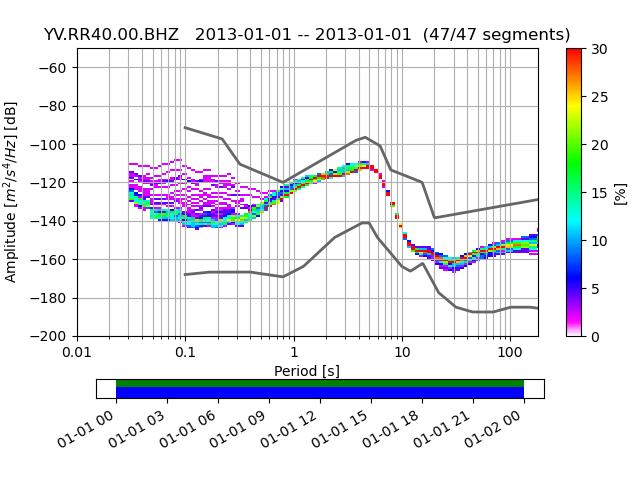

In [7]:
st = read(
    "/home/obsworkshop/Desktop/Data/QC/data_rhum_rum_continuous/continuous01/raw/YV.RR40.00.BHZ"
)
inv = read_inventory(
    "/home/obsworkshop/Desktop/Data/QC/data_rhum_rum_continuous/continuous01/resp/STXML.YV.RR40.00.BHZ"
)

ppsd = PPSD(st[0].stats, metadata=inv)
ppsd.add(st[0])

ppsd.plot(cmap=pqlx)

### Example multiple day files

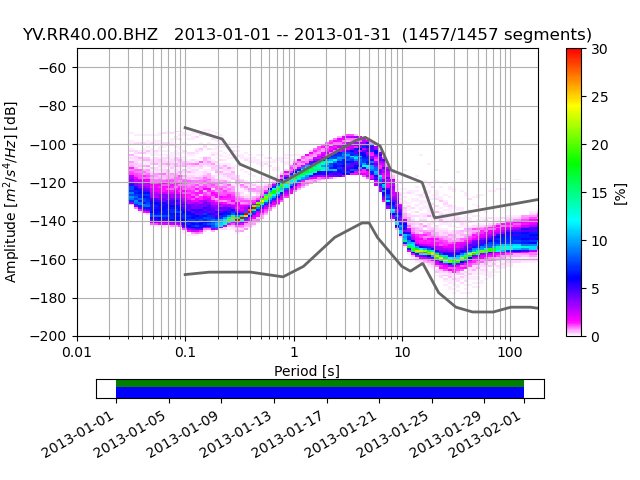

In [8]:
# locate all the mseed files
mseed_paths = glob.glob("/home/obsworkshop/Desktop/Data/QC/data_rhum_rum_continuous/continuous*/raw/*40*.BHZ")

for i, mseed_path in enumerate(mseed_paths):

    inv = read_inventory(
        os.path.join(mseed_path.split("/raw")[0], "resp", "STXML.YV.RR40.00.BHZ")
    )

    st = read(mseed_path)

    if i ==0:
        ppsd = PPSD(st[0].stats, metadata=inv)
        ppsd.add(st)
    else:
        st = read(mseed_path)
        ppsd.add(st)

ppsd.plot(cmap=pqlx)

### Some useful extra commands 

[UTCDateTime(2013, 1, 1, 0, 0, 0, 3800), UTCDateTime(2013, 1, 1, 0, 30, 0, 3800)]
Number of psd segments: 1457


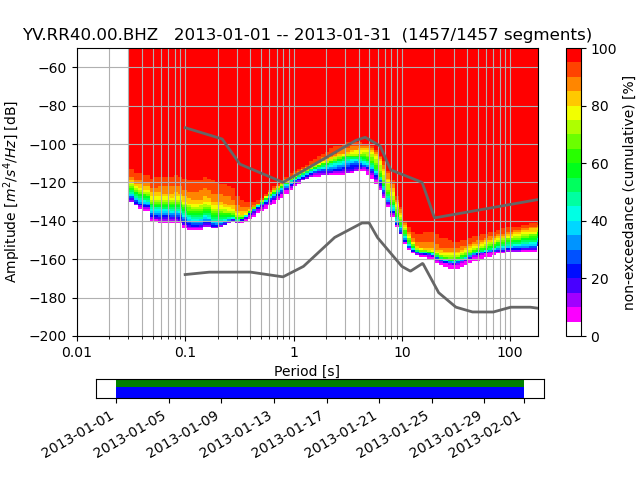

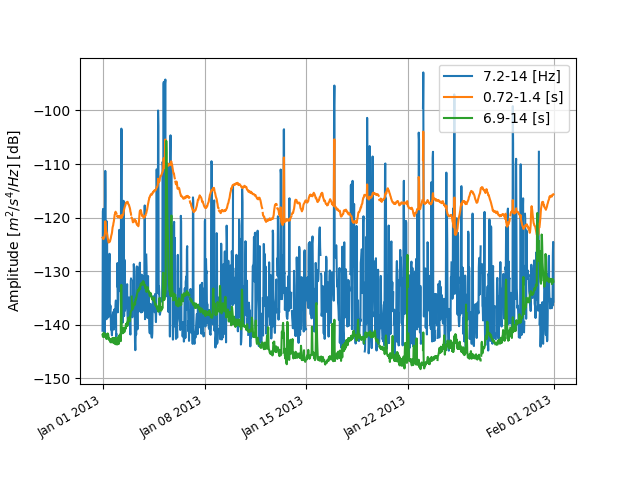

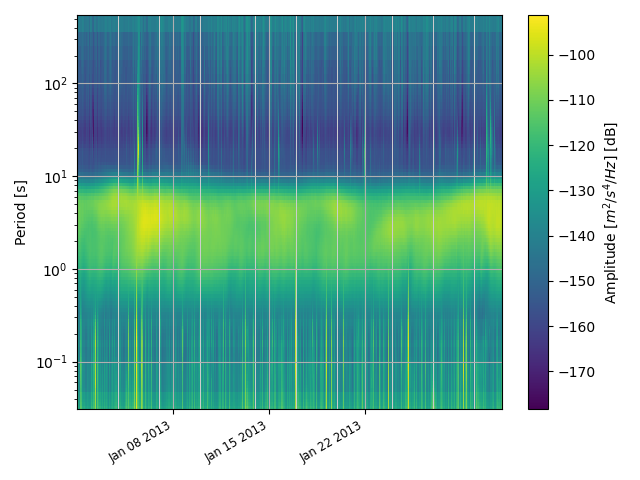

In [9]:
print(ppsd)
print(ppsd.times_processed[:2]) #check what time ranges are represented in the ppsd estimate
print("Number of psd segments:", len(ppsd.times_processed))


ppsd.plot(cumulative=True,cmap=pqlx) #cumulative version of the histogram

ppsd.plot_temporal(period=[0.1, 1.0, 10]) #The central period closest to the specified period is selected

ppsd.plot_spectrogram() #Plot the spectrogram for the whole duration

In [ ]:
# You can also save the ppsd file as .npz file to load later
ppsd.save("ppsd_RR40.npz")

## Further exercise

- Load the saved .npz file and try to plot the PPSD plot again. Hint: https://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.load_npz.html
- Download more data and add more days to the PPSD. Does it change?
- Can you plot time dependent PPSD (spring, summer, autumn, winter)? Hint: https://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.times_processed.html